# Weight Log 2021 Analysis
I've been recording my weight in lbs and body fat percentage every day for the year of 2021. For fun, I want to see if I can predicate my weight and bodyfat for a particular day.

I will be engineering a few new features:
* Scores: Computed scores based on $\sigma$ 
* Day of week: The day of the week for the recording.

# Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import Data

In [20]:
df = pd.read_csv("Weight-Log-2021.csv")

In [21]:
df.columns

Index(['Date', 'Weight (lbs)', 'Body Fat %', 'Total Delta', 'Sorted Weight',
       'Sorted BF%'],
      dtype='object')

In [22]:
df.describe()

,Weight (lbs),Total Delta,Sorted Weight
count,334.000000,0.0,334.000000
mean,141.182635,NaN,141.182635
std,1.401264,NaN,1.401264
min,137.000000,NaN,137.000000
25%,140.000000,NaN,140.000000
50%,141.000000,NaN,141.000000
75%,142.000000,NaN,142.000000
max,147.000000,NaN,147.000000


In [23]:
df.head()

,Date,Weight (lbs),Body Fat %,Total Delta,Sorted Weight,Sorted BF%
0,2021-01-01,142,10.00%,NaN,137,9.10%
1,2021-01-02,142,9.80%,NaN,138,9.20%
2,2021-01-03,142,9.90%,NaN,138,9.20%
3,2021-01-04,141,9.90%,NaN,138,9.20%
4,2021-01-05,140,9.80%,NaN,138,9.20%


# Clean Data

In [24]:
# Copy the data frame
df_cleaned = df.copy()


In [25]:
# Removed Unnecessary Columns
df_cleaned = df_cleaned[["Date", "Weight (lbs)", "Body Fat %"]]

In [26]:
def clean_percent_data(s: str) -> float:
    return float(s.replace("%", ""))


In [27]:
# Convert percent data to floats
df_cleaned.loc[:, "Body Fat %"] = df.loc[:, "Body Fat %"].map(clean_percent_data)

In [28]:
# Convert Date to a date
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

# Feature Engineering
I will add the following columns:
* Day of Week
* Weight Score
* BFP Score

`Day of Week` will be a mapping from the `Date` column and the `Score` features will be based on their respective measurements and their distances from the mean.

## Score Logic
I will use the mean and standard deviation to grade the weight and body fat percentage. Being `below` the mean will give a good score and being `above` will give a bad score.

| Score | Value |
| --- | --- |
| 3 | `v` <= -1 $\sigma$|
| 2 | -1 $\sigma$ < `v` < +1 $\sigma$|
| 1 | `v` >= +1 $\sigma$|



In [29]:
# Day of week
df_cleaned["Day of Week"] = df_cleaned["Date"].map(lambda d: d.day_of_week)

In [30]:
# Scoring Weight
weight_mean = df_cleaned["Weight (lbs)"].mean()
weight_std = df_cleaned["Weight (lbs)"].std()

def weight_score(w: int) -> int:
    if w <= weight_mean - weight_std:
        return 3
    if w >= weight_mean + weight_std:
        return 1
    return 2

df_cleaned["Weight Score"] = df_cleaned["Weight (lbs)"].map(weight_score)

In [31]:
df_cleaned.head()

,Date,Weight (lbs),Body Fat %,Day of Week,Weight Score
0,2021-01-01,142,10.0,4,2
1,2021-01-02,142,9.8,5,2
2,2021-01-03,142,9.9,6,2
3,2021-01-04,141,9.9,0,2
4,2021-01-05,140,9.8,1,2


In [32]:
# Scoring Body Fat Percentage
bfp_mean = df_cleaned["Body Fat %"].mean()
bfp_std = df_cleaned["Body Fat %"].std()

def bfp_score(bfp: float) -> int:
    if bfp <= bfp_mean - bfp_std:
        return 3
    if bfp >= bfp_mean + bfp_std:
        return 1
    return 2

df_cleaned["BFP Score"] = df_cleaned["Body Fat %"].map(bfp_score)

In [33]:
df_cleaned.describe()

,Weight (lbs),Body Fat %,Day of Week,Weight Score,BFP Score
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,141.182635,9.926048,2.997006,1.934132,2.017964
std,1.401264,0.290611,2.008239,0.447049,0.507873
min,137.000000,9.100000,0.000000,1.000000,1.000000
25%,140.000000,9.700000,1.000000,2.000000,2.000000
50%,141.000000,9.900000,3.000000,2.000000,2.000000
75%,142.000000,10.100000,5.000000,2.000000,2.000000
max,147.000000,11.200000,6.000000,3.000000,3.000000


# Fun Analysis

## Feature Frequency per Day

In [101]:
def feature_freq_per_day(feature):
    plt.figure(figsize=(16,8))
    sns.histplot(data=df_cleaned, x="Day of Week", y=feature, bins=7)
    plt.xticks(list(range(7)), ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], rotation=45)
    plt.title(f"{feature} Frequency per Day", fontsize=16)

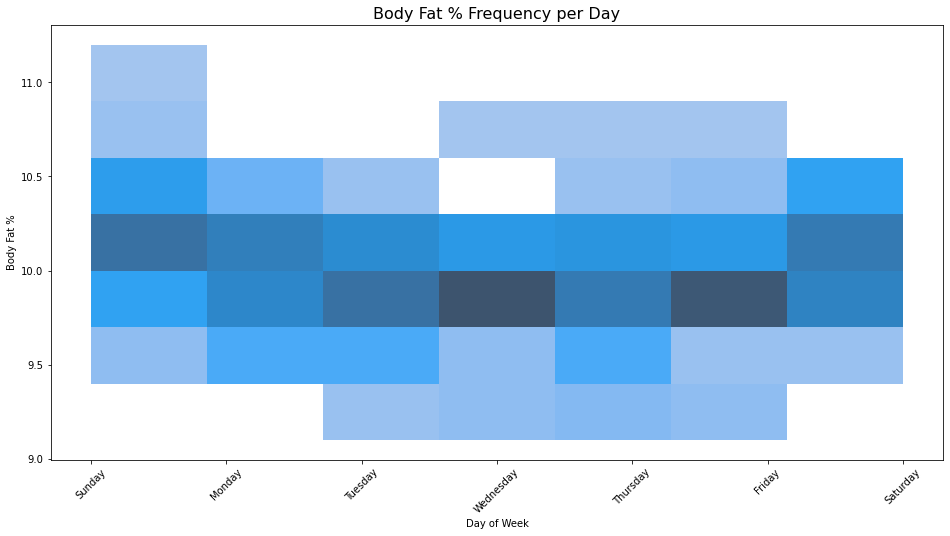

In [102]:
feature_freq_per_day("Body Fat %")

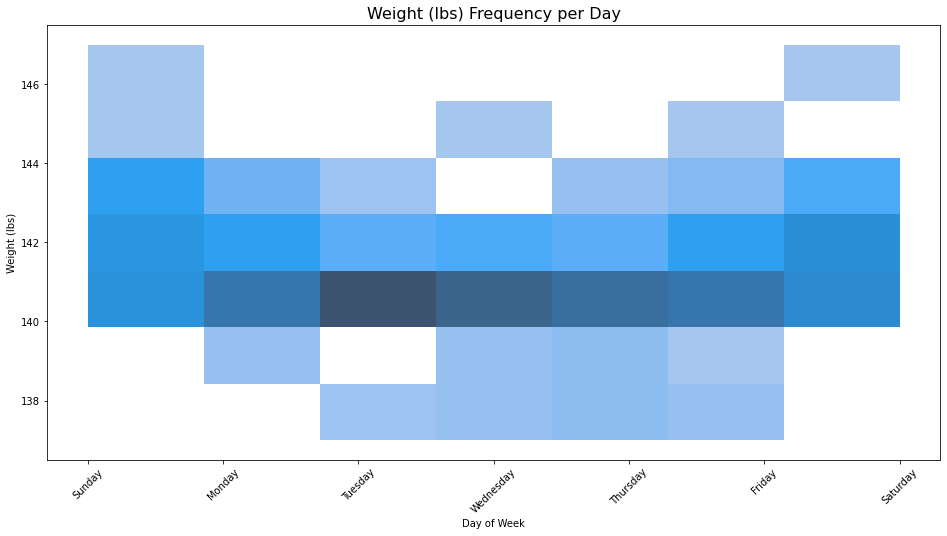

In [144]:
feature_freq_per_day("Weight (lbs)")

([<matplotlib.axis.YTick at 0x7f9fae0f41c0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

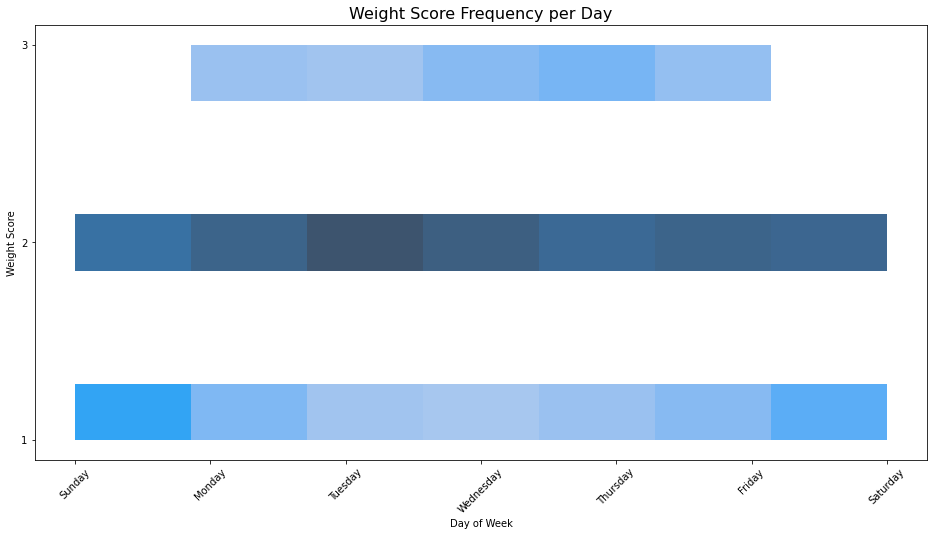

In [106]:
feature_freq_per_day("Weight Score")
plt.yticks(list(range(1,4)))

([<matplotlib.axis.YTick at 0x7f9fae29a1f0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

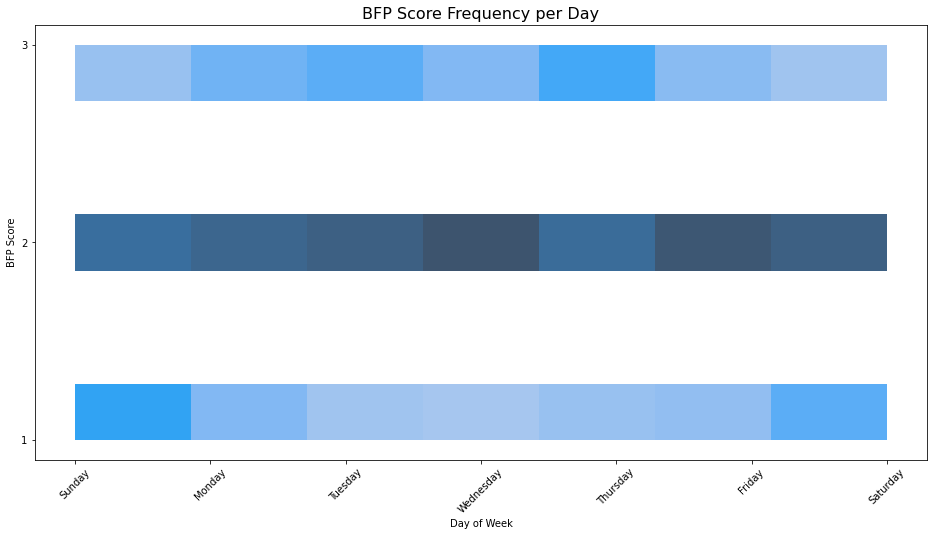

In [105]:
feature_freq_per_day("BFP Score")
plt.yticks(list(range(1,4)))

## Distributions

Text(0.5, 1.0, 'Body Fat % Distribution')

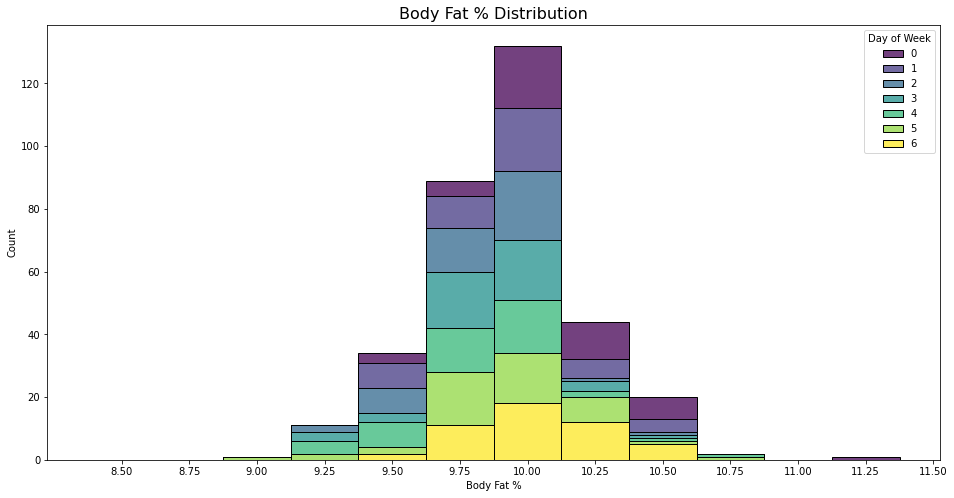

In [138]:
plt.figure(figsize=(16,8))
bins = np.arange(8.5,11.75,0.25) - (0.25/2)
sns.histplot(data=df_cleaned,x="Body Fat %", hue="Day of Week", bins=bins, multiple="stack", palette="viridis")
plt.xticks(np.arange(8.5,11.75,0.25))
plt.title("Body Fat % Distribution", fontsize=16)

Text(0.5, 1.0, 'Weight (lbs) Distribution')

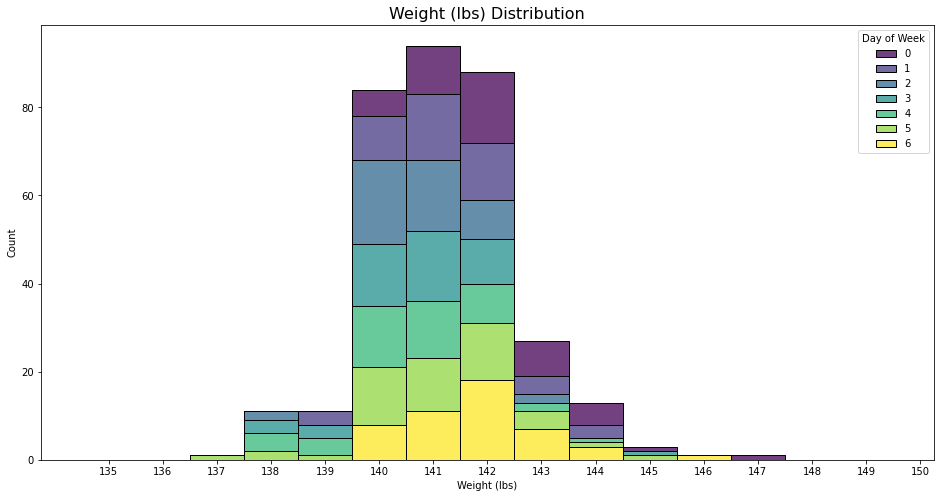

In [147]:
plt.figure(figsize=(16,8))
bins = np.arange(135,151) - 0.5
sns.histplot(data=df_cleaned,x="Weight (lbs)", hue="Day of Week", bins=bins, multiple="stack", palette="viridis")
plt.xticks(range(135,151))
plt.title("Weight (lbs) Distribution", fontsize=16)

## Feature vs Date

In [142]:
def feature_vs_date(feature: str):
    plt.figure(figsize=(16,8))
    plt.plot(df_cleaned["Date"], df_cleaned[feature])
    plt.title(feature, fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.xticks(rotation=45)

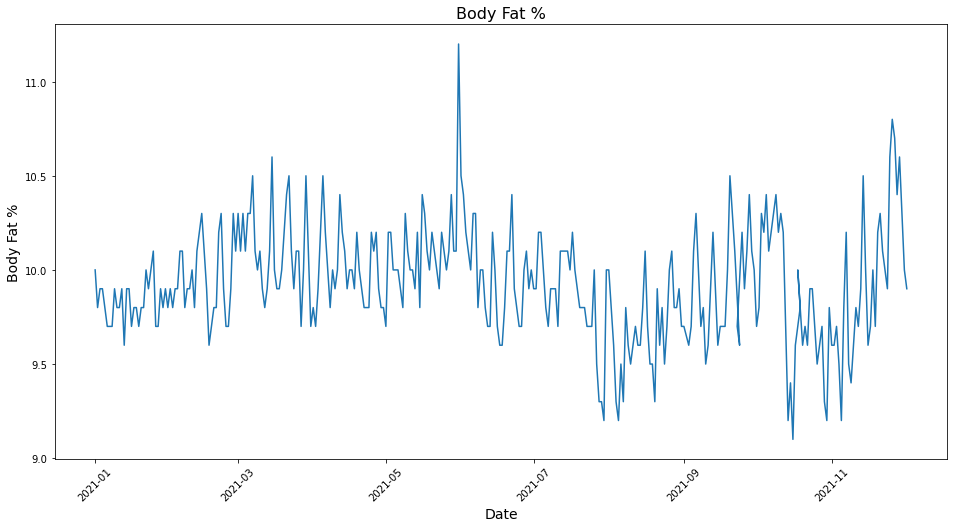

In [88]:
feature_vs_date("Body Fat %")


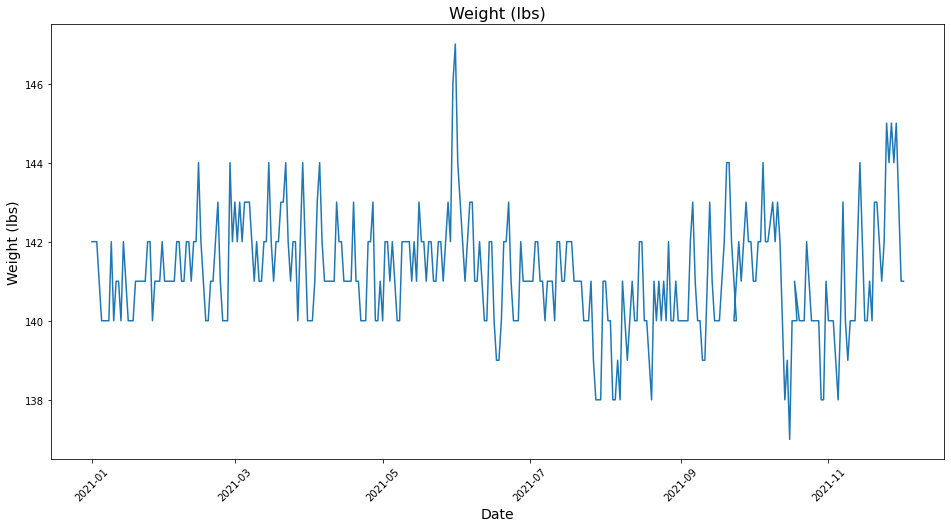

In [89]:
feature_vs_date("Weight (lbs)")

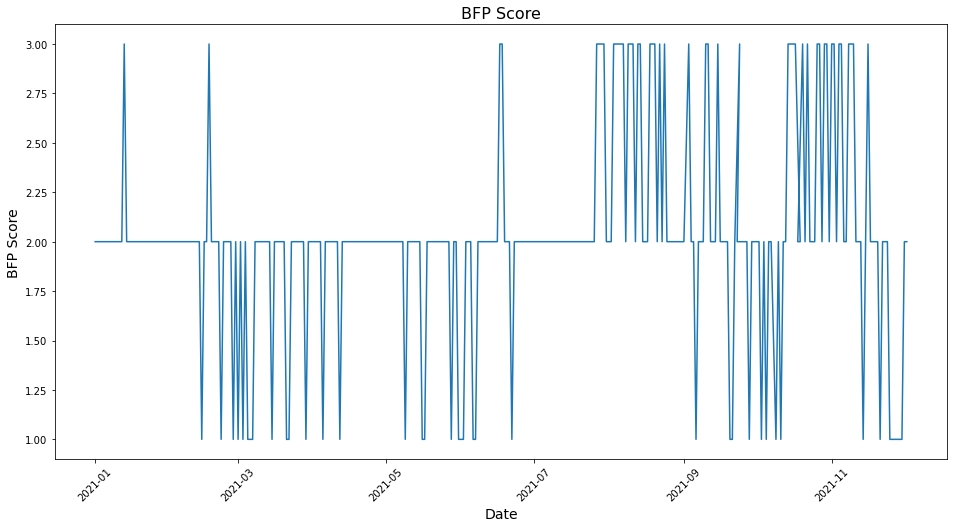

In [93]:
feature_vs_date("BFP Score")

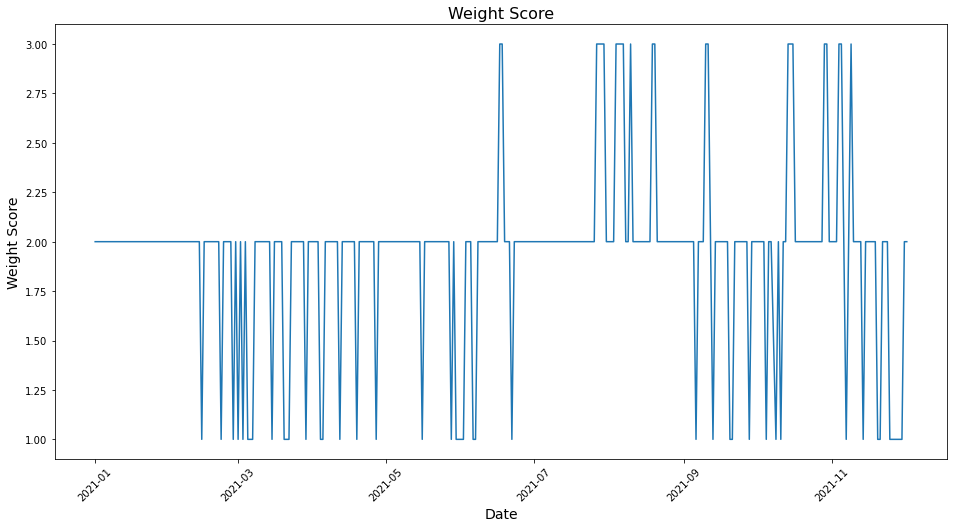

In [94]:
feature_vs_date("Weight Score")

([<matplotlib.axis.YTick at 0x7f9fab508820>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

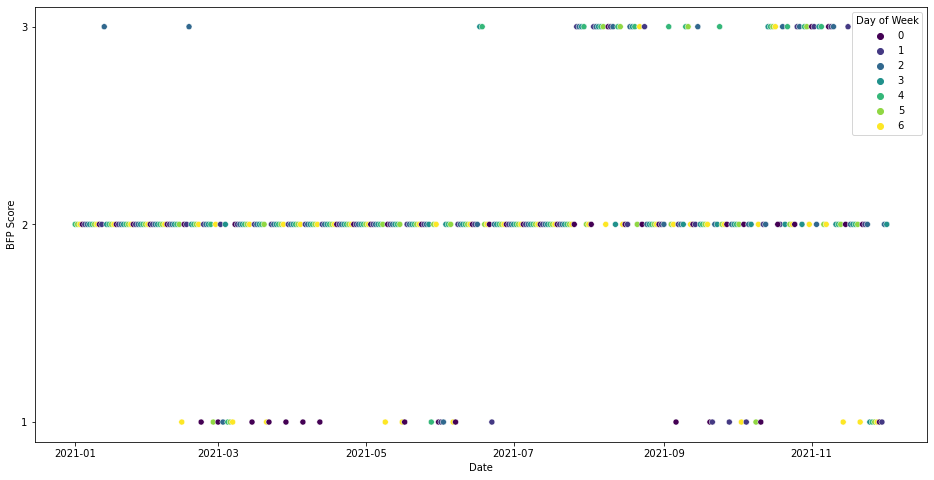

In [162]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df_cleaned, x=df_cleaned['Date'], y=df_cleaned['BFP Score'], hue="Day of Week", palette="viridis")
plt.yticks(list(range(1,4)))

([<matplotlib.axis.YTick at 0x7f9fab4a08e0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

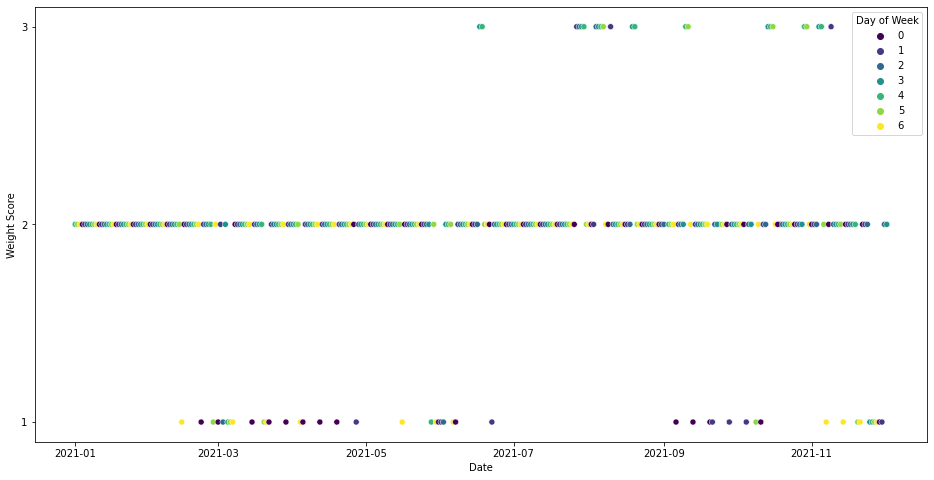

In [163]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df_cleaned, x=df_cleaned['Date'], y=df_cleaned['Weight Score'], hue="Day of Week", palette="viridis")
plt.yticks(list(range(1,4)))

